In [1]:
from rxntools.reaction import ChemicalReaction
from rxntools.template import ReactionTemplate
from rxntools.smiles import CombineMols
import rdkit.Chem.AllChem as Chem

# Example 1

In [2]:
rs = 'Cl.[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl.[CH3:39][N:14]([C:15](=[O:16])[N:17]([CH3:18])[C@@H:19]1[CH2:20][N:21]([C:31](=[O:32])[CH:33]2[CH2:34][CH2:35][NH:36][CH2:37][CH2:38]2)[CH2:22][C@H:23]1[c:24]1[cH:25][cH:26][c:27]([F:30])[cH:28][cH:29]1)[c:6]1[cH:7][c:8]([C:10]([F:11])([F:12])[F:13])[cH:9][c:4]([C:3]([F:40])([F:41])[F:2])[cH:5]1>>[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])[N:36]1[CH2:35][CH2:34][CH:33]([C:31](=[O:32])[N:21]2[CH2:22][C@@H:23]([c:24]3[cH:29][cH:28][c:27]([F:30])[cH:26][cH:25]3)[C@H:19]([N:17]([CH3:18])[C:15](=[O:16])[N:14]([CH3:39])[c:6]3[cH:7][c:8]([C:10]([F:12])([F:11])[F:13])[cH:9][c:4]([C:3]([F:40])([F:2])[F:41])[cH:5]3)[CH2:20]2)[CH2:38][CH2:37]1'
print(rs)

Cl.[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl.[CH3:39][N:14]([C:15](=[O:16])[N:17]([CH3:18])[C@@H:19]1[CH2:20][N:21]([C:31](=[O:32])[CH:33]2[CH2:34][CH2:35][NH:36][CH2:37][CH2:38]2)[CH2:22][C@H:23]1[c:24]1[cH:25][cH:26][c:27]([F:30])[cH:28][cH:29]1)[c:6]1[cH:7][c:8]([C:10]([F:11])([F:12])[F:13])[cH:9][c:4]([C:3]([F:40])([F:41])[F:2])[cH:5]1>>[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])[N:36]1[CH2:35][CH2:34][CH:33]([C:31](=[O:32])[N:21]2[CH2:22][C@@H:23]([c:24]3[cH:29][cH:28][c:27]([F:30])[cH:26][cH:25]3)[C@H:19]([N:17]([CH3:18])[C:15](=[O:16])[N:14]([CH3:39])[c:6]3[cH:7][c:8]([C:10]([F:12])([F:11])[F:13])[cH:9][c:4]([C:3]([F:40])([F:2])[F:41])[cH:5]3)[CH2:20]2)[CH2:38][CH2:37]1


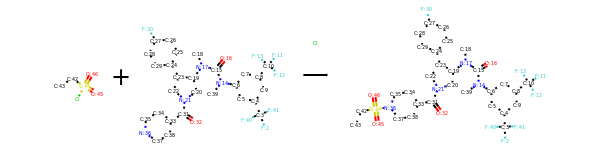

In [3]:
# load ChemicalReaction object from rxntools good smarts
cr = ChemicalReaction(rs)
good_smarts = cr.Smarts
cr = ChemicalReaction(good_smarts)
cr.Check()
cr.rxn

In [4]:
# chirality error when extract reaction template.
cr.ExtractTemplate()

'[C:1]-[C;H2;D2;+0:4]-[N;H1;D2;+0:6]-[C;H2;D2;+0:5]-[C:2].[Cl;D1;H0]-[S;H0;D4;+0:9](-[C:3])(=[O;D1;H0:7])=[O;D1;H0:8]>>[C:1]-[C;H2;D2;+0:4]-[N;H0;D3;+0:6](-[C;H2;D2;+0:5]-[C:2])-[S;H0;D4;+0:9](-[C:3])(=[O;D1;H0:7])=[O;D1;H0:8]'

# Example 2

The reaction with symmetric reactants, the same atom map number exists more than once is considered bad reaction smarts in rxntools.

In [5]:
rs = 'CCN(CC)CC.[CH3:16][C:15]([CH3:17])([CH3:18])[O:14][C:12](=[O:13])O[C:12](=[O:13])[O:14][C:15]([CH3:16])([CH3:17])[CH3:18].[NH2:11][CH2:10][CH2:9][n:6]1[cH:7][cH:8][c:4]([N+:1](=[O:2])[O-:3])[n:5]1>ClCCl>[CH3:16][C:15]([CH3:17])([CH3:18])[O:14][C:12](=[O:13])[NH:11][CH2:10][CH2:9][n:6]1[cH:7][cH:8][c:4]([N+:1](=[O:2])[O-:3])[n:5]1'
print(rs)

CCN(CC)CC.[CH3:16][C:15]([CH3:17])([CH3:18])[O:14][C:12](=[O:13])O[C:12](=[O:13])[O:14][C:15]([CH3:16])([CH3:17])[CH3:18].[NH2:11][CH2:10][CH2:9][n:6]1[cH:7][cH:8][c:4]([N+:1](=[O:2])[O-:3])[n:5]1>ClCCl>[CH3:16][C:15]([CH3:17])([CH3:18])[O:14][C:12](=[O:13])[NH:11][CH2:10][CH2:9][n:6]1[cH:7][cH:8][c:4]([N+:1](=[O:2])[O-:3])[n:5]1


In [6]:
# load ChemicalReaction object from rxntools good smarts
cr = ChemicalReaction(rs)
good_smarts = cr.Smarts
cr = ChemicalReaction(good_smarts)
cr.Check()

AssertionError: 

In [ ]:
Chem.Draw.MolToImage(cr.reactants[0], size=(300,300))

# Example 3

Absolute chirality changed. Example in Figure 1 of Rdchiral paper.

In [7]:
rs = '[CH3:1][CH2:2][O].[O:3][C:4](=[O:5])[C:6][C@H:7]([CH3:8])[CH2:9][C:10](=[O:11])[O:12][CH3:13]>>[CH3:1][CH2:2][O:3][C:4](=[O:5])[C:6][C@H:7]([CH3:8])[CH2:9][C:10](=[O:11])[O:12][CH3:13]'
print(rs)

[CH3:1][CH2:2][O].[O:3][C:4](=[O:5])[C:6][C@H:7]([CH3:8])[CH2:9][C:10](=[O:11])[O:12][CH3:13]>>[CH3:1][CH2:2][O:3][C:4](=[O:5])[C:6][C@H:7]([CH3:8])[CH2:9][C:10](=[O:11])[O:12][CH3:13]


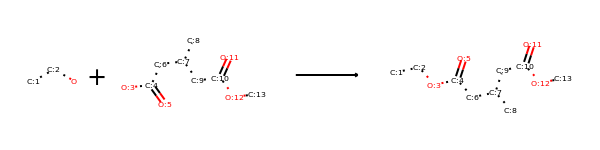

In [8]:
# load ChemicalReaction object from rxntools good smarts
cr = ChemicalReaction(rs)
good_smarts = cr.Smarts
cr = ChemicalReaction(good_smarts)
cr.Check()
cr.rxn

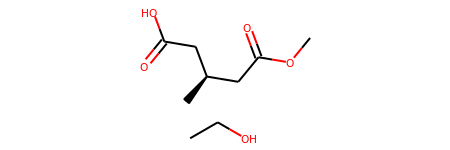

In [9]:
Chem.MolFromSmiles(cr.reactants_SMILES)

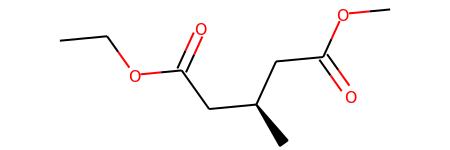

In [10]:
Chem.MolFromSmiles(cr.products_SMILES)

In [11]:
# chirality error when extract reaction template.
cr.ExtractTemplate()

'[C:1]-[C;H0;D3;+0:2](=[O;D1;H0:5])-[O;H1;D1;+0:6].[O;D1;H1]-[C;H2;D2;+0:3]-[C;D1;H3:4]>>[C:1]-[C;H0;D3;+0:2](=[O;D1;H0:5])-[O;H0;D2;+0:6]-[C;H2;D2;+0:3]-[C;D1;H3:4]'

# Example 4

Chiral reaction template. Example in TOC figure of Rdchiral paper. The reaction smarts extracted directly get correct chirality when applying it to reactants.

In [12]:
rs = '[CH3:1][CH2:2][CH2:3][C@H:4]([CH3:5])[Br:6]>>[CH3:1][CH2:2][CH2:3][C@@H:4]([CH3:5])[I:6]'
print(rs)

[CH3:1][CH2:2][CH2:3][C@H:4]([CH3:5])[Br:6]>>[CH3:1][CH2:2][CH2:3][C@@H:4]([CH3:5])[I:6]


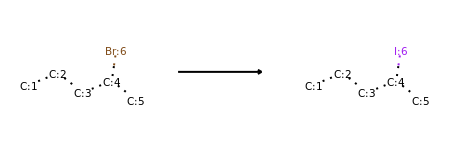

In [13]:
# load ChemicalReaction object from rxntools good smarts
cr = ChemicalReaction(rs)
good_smarts = cr.Smarts
cr = ChemicalReaction(good_smarts)
cr.Check()
cr.rxn

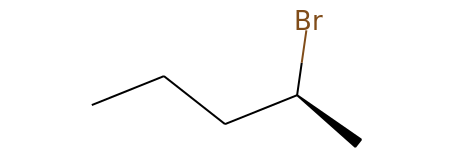

In [14]:
Chem.MolFromSmiles(cr.reactants_SMILES)

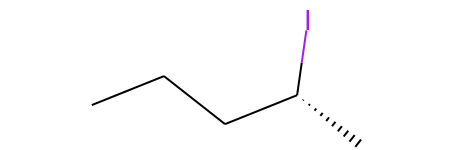

In [15]:
Chem.MolFromSmiles(cr.products_SMILES)

In [16]:
# chirality error when extract reaction template.
cr.ExtractTemplate()

'[C:1]-[C@;H1;D3;+0:2](-[C;D1;H3:3])-[Br;H0;D1;+0:4]>>[C:1]-[C@@;H1;D3;+0:2](-[C;D1;H3:3])-[I;H0;D1;+0:4]'